## Problema 2:  PDE con Diferencias Finitas

Presentado por Diego Useche Reyes

Video: https://www.youtube.com/watch?v=iMOxuSZ360o

Este es un codigo tomado del profesor David Ketcheson, del repositorio https://github.com/ahmadia/py4sci/ El cual resuelve las siguientes PDE con el metodo de diferencias finitas.

  $$     u_t = D_1 \nabla^2 u + f(u,v) $$
  $$    v_t = D_2 \nabla^2 v + g(u,v)  $$

In [2]:
import matplotlib
# matplotlib.use('TkAgg')
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags,linalg,eye
from time import sleep



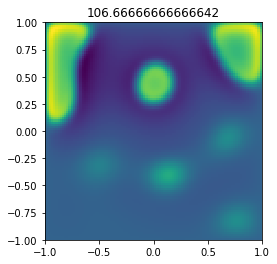

In [6]:

#Parameter values
Du=0.500; Dv=1;
delta=0.0045; tau1=0.02; tau2=0.2; alpha=0.899; beta=-0.91; gamma=-alpha;
#delta=0.0045; tau1=0.02; tau2=0.2; alpha=1.9; beta=-0.91; gamma=-alpha;
#delta=0.0045; tau1=2.02; tau2=0.; alpha=2.0; beta=-0.91; gamma=-alpha;
#delta=0.0021; tau1=3.5; tau2=0; alpha=0.899; beta=-0.91; gamma=-alpha;
#delta=0.0045; tau1=0.02; tau2=0.2; alpha=1.9; beta=-0.85; gamma=-alpha;
#delta=0.0001; tau1=0.02; tau2=0.2; alpha=0.899; beta=-0.91; gamma=-alpha;
#delta=0.0005; tau1=2.02; tau2=0.; alpha=2.0; beta=-0.91; gamma=-alpha; nx=150;

#Define the reaction functions
def f(u,v):
    return alpha*u*(1-tau1*v**2) + v*(1-tau2*u);

def g(u,v):
    return beta*v*(1+alpha*tau1/beta*u*v) + u*(gamma+tau2*v);


def five_pt_laplacian(m,a,b):
    """Construct a matrix that applies the 5-point laplacian discretization"""
    e=np.ones(m**2)
    e2=([0]+[1]*(m-1))*m
    h=(b-a)/(m+1)
    A=np.diag(-4*e,0)+np.diag(e2[1:],-1)+np.diag(e2[1:],1)+np.diag(e[m:],m)+np.diag(e[m:],-m)
    A/=h**2
    return A

def five_pt_laplacian_sparse(m,a,b):
    """Construct a sparse matrix that applies the 5-point laplacian discretization"""
    e=np.ones(m**2)
    e2=([1]*(m-1)+[0])*m
    e3=([0]+[1]*(m-1))*m
    h=(b-a)/(m+1)
    A=spdiags([-4*e,e2,e3,e,e],[0,-1,1,-m,m],m**2,m**2)
    A/=h**2
    return A

# Set up the grid
a=-1.; b=1.
m=100; h=(b-a)/m; 
x = np.linspace(-1,1,m)
y = np.linspace(-1,1,m)
Y,X = np.meshgrid(y,x)

# Initial data
u=np.random.randn(m,m)/2.;
v=np.random.randn(m,m)/2.;
# plt.hold(False)
plt.pcolormesh(x,y,u)
plt.colorbar; plt.axis('image'); 
plt.draw()
u=u.reshape(-1)
v=v.reshape(-1)

A=five_pt_laplacian_sparse(m,-1.,1.);
II=eye(m*m,m*m)

t=0.
dt=h/delta/5.;
plt.ion()

#Now step forward in time
for k in range(120):
    #Simple (1st-order) operator splitting:
    u = linalg.spsolve(II-dt*delta*Du*A,u)
    v = linalg.spsolve(II-dt*delta*Dv*A,v)

    unew=u+dt*f(u,v);
    v   =v+dt*g(u,v);
    u=unew;
    t=t+dt;

    #Plot every 3rd frame
    if k/3==float(k)/3:
        U=u.reshape((m,m))
        plt.pcolormesh(x,y,U)
        plt.colorbar
        plt.axis('image')
        plt.title(str(t))
        plt.draw()

plt.ioff()